In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
import pickle

# Loading dataset

In [2]:
df = pd.read_csv("data/BBC News Train.csv")
df_test  = pd.read_csv("data/BBC News Test.csv")

In [3]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
df.drop(["ArticleId"], axis=1, inplace = True)

In [5]:
df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


C:\Users\mayan\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


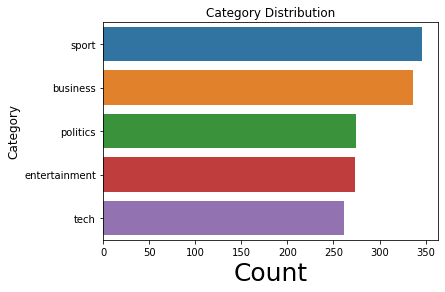

In [6]:
cat_count = df['Category'].value_counts()
sns.barplot( cat_count.values, cat_count.index,alpha= 1)
plt.title('Category Distribution')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=25)
plt.show()

In [7]:
print("Category - ", "Business")
print("Article - \n", df[df["Category"] == "business"]["Text"][0])

Category -  Business
Article - 
 worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and pr

In [8]:
print("Category - ", "Tech")
print("Artice - \n", df[df['Category'] == 'tech']['Text'][3])

Category -  Tech
Artice - 
 lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone. 

In [9]:
print("Category - ", "Entertainment")
print("Artice - \n", df[df['Category'] == 'entertainment']['Text'][7])

Category -  Entertainment
Artice - 
 french honour for director parker british film director sir alan parker has been made an officer in the order of arts and letters  one of france s highest cultural honours.  sir alan received his decoration in paris on wednesday from french culture minister renaud donnedieu de vabres.  you have explored the possibilities of film with an immense talent   mr de vabres said as he presented the award. parker praised french films  saying:  hollywood  which created modern cinema  uses it only as a commodity.  he told the minister:  i am honoured to be thus distinguished by france  the flag carrier of cinema throughout the world.  sir alan s films include oscar-winning fame plus midnight express and the commitments.  a founding member of the director s guild of great britain  he is a former chairman of the uk film council and on the board of the british film institute.  through your work and your campaigns  you have shown us how the artist occupies an esse

In [10]:
print("Category - ", "Sports")
print("Artice - \n", df[df['Category'] == 'sport']['Text'][6])

Category -  Sports
Artice - 
 wales silent on grand slam talk rhys williams says wales are still not thinking of winning the grand slam despite a third six nations win.   that s the last thing on our minds at the moment   said williams  a second- half replacement in saturday s 24-18 win over france in paris.  we all realise how difficult a task it is to go up to scotland and beat them.  we ve come unstuck there a couple of times recently so our focus is on that game and we ll worry about ireland hopefully after we ve beaten scotland.  with captain gareth thomas ruled out of the rest of the campaign with a broken thumb  williams is vying for his first start in the championship so far.  kevin morgan is probably favourite to replace thomas at full-back  leaving williams and hal luscombe to battle for the right wing berth. a hamstring injury denied luscombe the opportunity to make a third successive start  but the dragons winger is expected to be fit for the trip to murrayfield on 13 march

In [11]:
print("Category - ", "Poilitics")
print("Artice - \n", df[df['Category'] == 'politics']['Text'][5])

Category -  Poilitics
Artice - 
 howard  truanted to play snooker  conservative leader michael howard has admitted he used to play truant to spend time with his school friends at a snooker hall.  mr howard said his time at jack s snooker hall in llanelli in the 1950s had not done him  any lasting damage . but he told the times educational supplement that truancy was  very bad  and said  firm action  was needed. mr howard also called for a return to o-levels and more classroom discipline.  mr howard eventually left llanelli grammar school - and the snooker hall - to go to cambridge university. he said:  i don t think it s done me any lasting damage. nor has it made me a snooker world champion.  there might have been some occasions when we left early of an afternoon.   i m just being honest. i think truancy is a very bad thing and that firm action should be taken to deal with it.  another player who has failed to win snooker s world championship - jimmy  the whirlwind   white - has previ

# Mapping the category (Y)
business  - 1 <br>
entertainment  - 2 <br>
politics  - 3 <br>
sport  - 4 <br>
tech  - 5 <br>

In [12]:
df['num_cat'] = df['Category'].map({'business': 1, 'entertainment': 2, 'politics':3, 'sport': 4, 'tech':5})

In [13]:
df.head()

,Text,Category,num_cat
0,worldcom ex-boss launches defence lawyers defe...,business,1
1,german business confidence slides german busin...,business,1
2,bbc poll indicates economic gloom citizens in ...,business,1
3,lifestyle governs mobile choice faster bett...,tech,5
4,enron bosses in $168m payout eighteen former e...,business,1


In [14]:
df.head()

,Text,Category,num_cat
0,worldcom ex-boss launches defence lawyers defe...,business,1
1,german business confidence slides german busin...,business,1
2,bbc poll indicates economic gloom citizens in ...,business,1
3,lifestyle governs mobile choice faster bett...,tech,5
4,enron bosses in $168m payout eighteen former e...,business,1


In [15]:
lemmatizer = WordNetLemmatizer()
def essential_preprocess(article):
    corpus = []
    for i in range(0, len(article)):
        review = re.sub('[^a-zA-Z]', ' ', article[i]) ## keeping only character
        review = review.lower() #lowering the words
        review = review.split() # converting sentences to words
        review = [lemmatizer.lemmatize(word)  for word in review if not word in stopwords.words('english')] # Lemmatizing or finding root word
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [16]:
corpus =  essential_preprocess(df['Text'])

len_article = []
for i in range(len(corpus)):
    len_article.append(len(corpus[i]))
    
clean_text_df = pd.DataFrame(list(zip(corpus, df["num_cat"],df["Category"],len_article)), 
               columns =['Text', 'num_cat','Category','len_article']) 
clean_text_df.head()

,Text,num_cat,Category,len_article
0,worldcom ex bos launch defence lawyer defendin...,1,business,1355
1,german business confidence slide german busine...,1,business,1449
2,bbc poll indicates economic gloom citizen majo...,1,business,2006
3,lifestyle governs mobile choice faster better ...,5,tech,2310
4,enron boss payout eighteen former enron direct...,1,business,1488


(array([105., 707., 434., 165.,  59.,   9.,   5.,   1.,   2.,   0.]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <BarContainer object of 10 artists>)

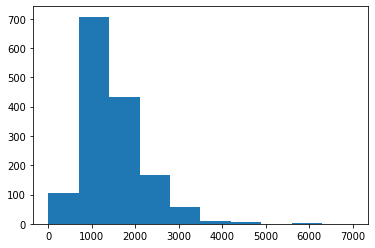

In [17]:
plt.hist(clean_text_df['len_article'], range = [0,7000])

# Creating word clouds

In [18]:
def visualize(label):
    words = ''
    for msg in clean_text_df[clean_text_df['Category'] == label]['Text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

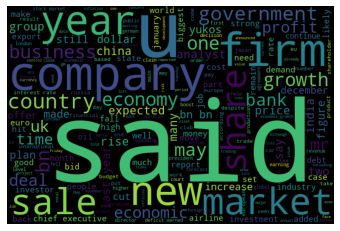

In [19]:
visualize('business')

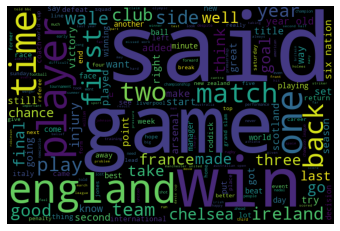

In [20]:
visualize('sport')

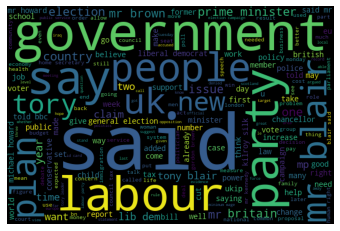

In [21]:
visualize('politics')

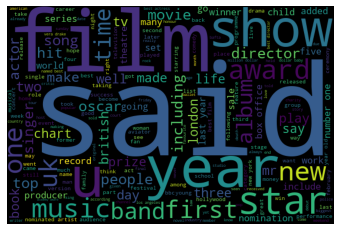

In [22]:
visualize('entertainment')

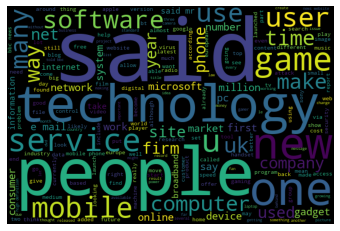

In [25]:
visualize('tech')

In [23]:
corpus = essential_preprocess(df['Text'])

# CountVectorizer model

In [36]:
cv = CountVectorizer()
X = cv.fit_transform(corpus)     
pickle.dump(cv, open('tranformcv.pkl', 'wb'))

In [37]:
Y = df["num_cat"]

In [38]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,  random_state=42)

In [57]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("train score:", nb.score(X_train, y_train))
print("test score:", nb.score(X_test,y_test))

pickle.dump(nb, open('nbcv.pkl', 'wb'))

train score: 0.9941275167785235
test score: 0.9798657718120806


In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("train score:", lr.score(X_train, y_train))
print("test score:", lr.score(X_test,y_test))
pickle.dump(lr, open('lrcv.pkl', 'wb'))

train score: 1.0
test score: 0.9697986577181208


# Tf-iDF  Model

In [59]:
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
pickle.dump(cv, open('tranformtfidf.pkl', 'wb'))

In [60]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("train score:", nb.score(X_train, y_train))
print("test score:", nb.score(X_test,y_test))
pickle.dump(nb, open('nbtfidf.pkl', 'wb'))

train score: 0.9941275167785235
test score: 0.9798657718120806


In [61]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("train score:", lr.score(X_train, y_train))
print("test score:", lr.score(X_test,y_test))
ts_acc_lr_tf = lr.score(X_test,y_test)
tr_acc_lr_tf = lr.score(X_train, y_train)
pickle.dump(lr, open('lrtfidf.pkl', 'wb'))

train score: 1.0
test score: 0.9697986577181208


In [62]:
df_test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [79]:
corpus =  essential_preprocess(df_test['Text'])

In [80]:
cv = pickle.load(open("tranformcv.pkl", 'rb'))

In [81]:
X_t = cv.transform(corpus) 

In [82]:
nb_cv = pickle.load(open("nbcv.pkl", 'rb'))

In [83]:
pred = nb_cv.predict(X_t)

In [84]:
df_test["pred"] = pred

In [85]:
df_test["Category"] = df_test["pred"].map({1:"business", 2: "entertainment",3:"politics",4:"sport",5:"tech"})

In [86]:
df_test

,ArticleId,Text,pred,Category
0,1018,qpr keeper day heads for preston queens park r...,4,sport
1,1319,software watching while you work software that...,5,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,4,sport
3,459,india s reliance family feud heats up the ongo...,1,business
4,1020,boro suffer morrison injury blow middlesbrough...,4,sport
...,...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,1,business
731,373,u2 to play at grammy awards show irish rock ba...,2,entertainment
732,1704,sport betting rules in spotlight a group of mp...,3,politics
733,206,alfa romeos to get gm engines fiat is to sto...,1,business


In [87]:
upload = df_test[["ArticleId","Category"]]

In [88]:
upload

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,politics
733,206,business


In [94]:
upload.to_csv("prediction.csv", sep=',', encoding='utf-8',index = False)

In [111]:
def preprocess(article):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', article) ## keeping only character
    review = review.lower() #lowering the words
    review = review.split() # converting sentences to words
    review = [lemmatizer.lemmatize(word)  for word in review if not word in stopwords.words('english')] # Lemmatizing or finding root word
    review = ' '.join(review)
    corpus.append(review)
    return corpus

In [122]:
def predicting_cat(pred):
    if pred == 1:
        return "business"
    elif pred == 2:
        return "entertainment"
    elif pred == 3:
        return "politics"
    elif pred == 4:
        return "sport"
    elif pred == 5:
        return "tech"

In [128]:
article = input("Enter Article: ")

Enter Article: Zenefits, once worth $4.5 billion, has completed a financing deal with private-equity firm Francisco Partners that gives the investment firm control of the company, Forbes has learned. The effective acquisition, the exact dollar figure of which remained unclear, represents quite a comedown for the one-time highflier.  Founded by Parker Conrad in 2013, the HR startup quickly became a tech darling, sporting that sky-high valuation within three years. Then, everything unraveled as the San Francisco-based company’s growth stalled amid compliance problems that included brokers selling health insurance in states where they weren’t licensed to do so.  Conrad resigned under pressure in February 2016, while Zenefits retrenched and slashed its valuation by more than half under new leadership. First, PayPal PYPL +2% cofounder and venture capitalist David Sacks took over as CEO. Then, in February 2017, he was succeeded by Jay Fulcher, Zenefits’ current CEO.


In [129]:
corpus = preprocess(article)
cv_transform = cv.transform(corpus) 
pred = nb_cv.predict(cv_transform)[0]
predicting_cat(pred)

'business'